<a href="https://colab.research.google.com/github/pankajan05/SE_2016_032/blob/main/Temperature_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/content/weather.xlsx')

In [ ]:
df.head()

,Time,Temperature,Atmospheric_pressure,Atmospheric_pressure_sea,Pa,Relative_humidity,wind_direction,Wind_speed(m/s),Total Cloud Coverage,Present_weather,Cloud,Cloud_present,horizontal visibility (km),Precipitation(millimeters)
0,31.12.2021 23:30,24.5,759.6,760.5,0.0,95.0,Wind blowing from the north,1.0,50%.,NaN,Cumulus humilis or Cumulus fractus other than ...,40%.,8.0,No precipitation
1,31.12.2021 20:30,24.5,759.6,760.5,1.7,94.0,"Calm, no wind",0.0,50%.,State of sky on the whole unchanged.,Cumulus humilis or Cumulus fractus other than ...,40%.,10.0,4.0
2,31.12.2021 17:30,25.8,757.9,758.8,0.3,86.0,"Calm, no wind",0.0,"90 or more, but not 100%","Rain shower(s), slight.","Cumulonimbus capillatus (often with an anvil),...",70 – 80%.,8.0,5.0
3,31.12.2021 14:30,30.5,757.6,758.5,-2.0,70.0,Wind blowing from the north,3.0,50%.,NaN,"Cumulus mediocris or congestus, with or withou...",50%.,20.0,No precipitation
4,31.12.2021 11:30,31.1,759.6,760.5,-0.1,59.0,Wind blowing from the north,1.0,50%.,NaN,Cumulus humilis or Cumulus fractus other than ...,20–30%.,20.0,No precipitation


In [ ]:
df.shape

(16441, 14)

In [ ]:
df.columns

Index(['Time', 'Temperature', 'Atmospheric_pressure',
       'Atmospheric_pressure_sea', 'Pa', 'Relative_humidity', 'wind_direction',
       'Wind_speed(m/s)', 'Total Cloud Coverage', 'Present_weather', 'Cloud',
       'Cloud_present', 'horizontal visibility (km)',
       'Precipitation(millimeters)'],
      dtype='object')

In [ ]:
df = df.drop(['Atmospheric_pressure',
       'Atmospheric_pressure_sea', 'Pa', 'Relative_humidity', 'wind_direction',
       'Wind_speed(m/s)', 'Total Cloud Coverage', 'Present_weather', 'Cloud',
       'Cloud_present', 'horizontal visibility (km)',
       'Precipitation(millimeters)'], axis=1)

In [ ]:
df.head()

,Time,Temperature
0,31.12.2021 23:30,24.5
1,31.12.2021 20:30,24.5
2,31.12.2021 17:30,25.8
3,31.12.2021 14:30,30.5
4,31.12.2021 11:30,31.1


In [ ]:
df.describe()

,Temperature
count,16436.000000
mean,27.585294
std,2.548739
min,18.300000
25%,25.500000
50%,27.600000
75%,29.500000
max,39.900000


In [ ]:
df["Time"]=pd.to_datetime(df["Time"],format="%d.%m.%Y %H:%M")

In [ ]:
df.dtypes

Time           datetime64[ns]
Temperature           float64
dtype: object

In [ ]:
df=df.set_index("Time")

In [ ]:
df.tail(8)


,Temperature
Time,
2015-11-01 23:30:00,24.5
2015-11-01 20:30:00,25.0
2015-11-01 17:30:00,27.1
2015-11-01 14:30:00,27.6
2015-11-01 11:30:00,29.0
2015-11-01 08:30:00,27.9
2015-11-01 05:30:00,24.4
2015-11-01 02:30:00,25.4


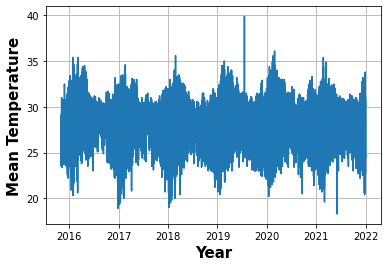

In [ ]:
import matplotlib.pyplot as plt

ax = plt.axes()
plt.xlabel("Year",fontsize="15",fontweight="bold")
plt.ylabel("Mean Temperature",fontsize="15",fontweight="bold")
plt.grid(True)
plt.plot(df)
plt.show()

In [ ]:
df = df.dropna()

In [ ]:
null=df[df.isnull().any(axis=1)]
print("Null values:",null.shape[0])

Null values: 0


In [ ]:

daily_mean=df.groupby(df.index.day).mean()
monthly_mean=df.groupby(df.index.month).mean()
hourly_mean=df.groupby(df.index.hour).mean()
yearly_mean=df.groupby(df.index.year).mean()



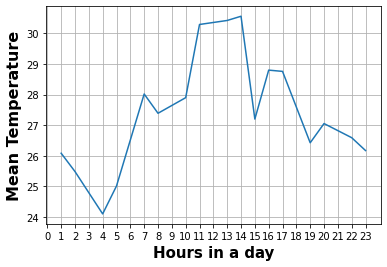

In [ ]:
ax=plt.axes()
plt.plot(hourly_mean)
plt.grid(True)
plt.xticks(range(0,24))
plt.xlabel("Hours in a day",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=16,fontweight="bold")
plt.show()

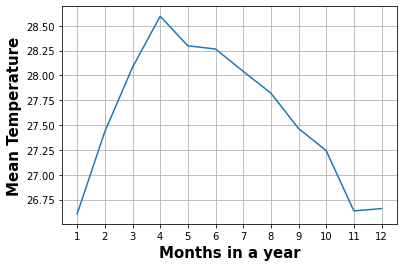

In [ ]:
ax=plt.axes()
plt.plot(monthly_mean)
plt.grid(True)
plt.xticks(range(1,13))
plt.xlabel("Months in a year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.show()

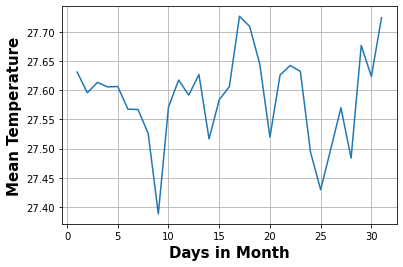

In [ ]:
ax=plt.axes()
plt.plot(daily_mean)
plt.grid(True)
plt.xlabel("Days in Month",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.show()

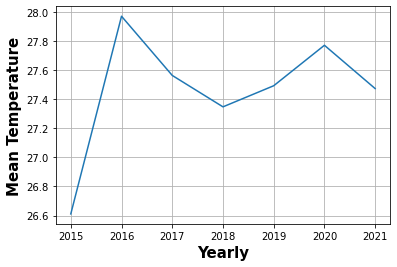

In [ ]:
ax=plt.axes()
plt.plot(yearly_mean)
plt.grid(True)
plt.xlabel("Yearly",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.show()

In [ ]:

daily=df.resample("D").mean()
print("Sample reduced by {} rows after resampling".format(df.shape[0]-daily.shape[0]))


Sample reduced by 14183 rows after resampling


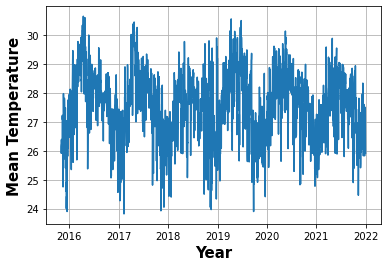

In [ ]:
ax=plt.axes()
plt.xlabel("Year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.grid(True)
plt.plot(daily)
plt.show()

In [ ]:

daily=daily["2016-01-01":"2022-01-01"]
daily.shape


(2192, 1)

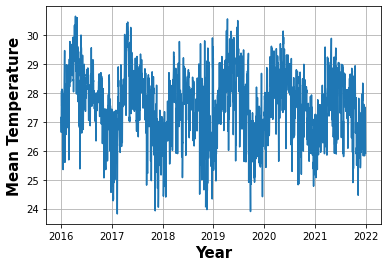

In [ ]:
ax=plt.axes()
plt.xlabel("Year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.grid(True)
plt.plot(daily)
plt.show()

In [ ]:
print("Null values before:",daily.isnull().sum())

daily=daily.fillna(method="ffill")

print("Null values After:",daily.isnull().sum())

Null values before: Temperature    8
dtype: int64
Null values After: Temperature    0
dtype: int64


In [ ]:

actual=daily['Temperature'].to_frame().rename(columns={ 'Temperature':"actual"})
predicted=daily['Temperature'].to_frame().shift(1).rename(columns={ 'Temperature':"predicted"})

df_daily=pd.concat([actual,predicted],axis=1)


In [ ]:
df_daily.head()

,actual,predicted
Time,,
2016-01-01,27.1500,NaN
2016-01-02,26.6375,27.1500
2016-01-03,27.8875,26.6375
2016-01-04,28.0625,27.8875
2016-01-05,27.5500,28.0625


In [ ]:
df_daily=df_daily[1:]

In [ ]:
from sklearn.metrics import mean_squared_error

rmse=mean_squared_error(df_daily["actual"],df_daily["predicted"],squared=False)
print("RMSE: {:.1f}".format(rmse))

RMSE: 0.9


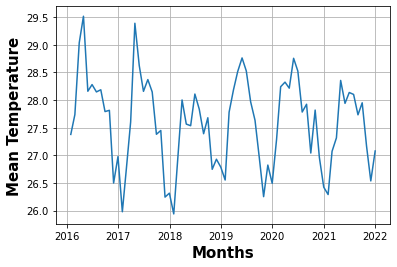

In [ ]:
monthly=daily.resample("M").mean()
ax=plt.axes()
plt.plot(monthly)
plt.xlabel("Months",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.grid(True)
plt.show()

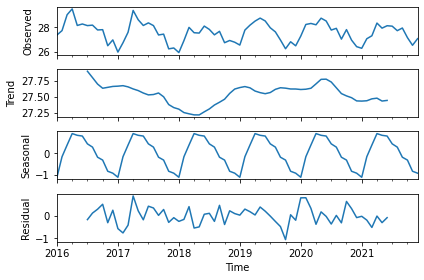

In [ ]:

from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(monthly)
result.plot()
plt.show()


In [ ]:
monthly

,Temperature
Time,
2016-01-31,27.378498
2016-02-29,27.737917
2016-03-31,29.038236
2016-04-30,29.518287
2016-05-31,28.160157
...,...
2021-08-31,27.733570
2021-09-30,27.951071
2021-10-31,27.163364


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def check_adfuller(data):
    result=adfuller(data)
    
    print("ADF statistics:{}".format(result[0]))
    print("p-value:{}".format(result[1]))
    print("lags used:{}".format(result[2]))
    print("No of observation:{}".format(result[3]))
    print()
    print("Critical Values:")
    for key,value in result[4].items():
        print("Critical({}):{}".format(key,value))  

In [ ]:
check_adfuller(monthly)

ValueError: ignored

In [ ]:
monthly["Seasonal Diff"]=daily['Temperature']-daily['Temperature'].shift(12)

In [ ]:
check_adfuller(monthly["Seasonal Diff"].dropna())

ADF statistics:-5.806886052093343
p-value:4.4948268640875155e-07
lags used:0
No of observation:71

Critical Values:
Critical(1%):-3.526004646825607
Critical(5%):-2.9032002348069774
Critical(10%):-2.5889948363419957


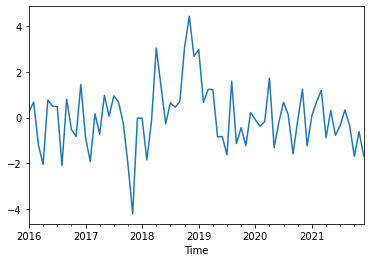

In [ ]:
monthly["Seasonal Diff"].plot()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

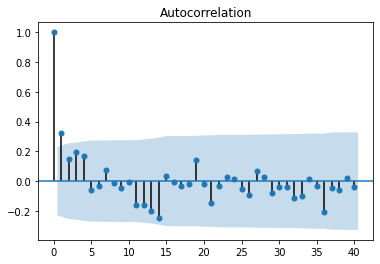

In [ ]:
plot_acf(monthly["Seasonal Diff"].dropna(),lags=40)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


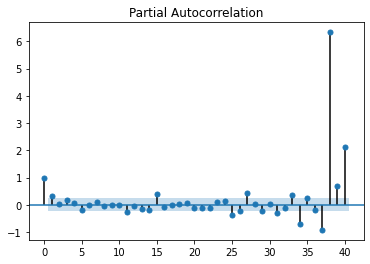

In [ ]:
plot_pacf(monthly["Seasonal Diff"].dropna(),lags=40)
plt.show()

In [ ]:
train=monthly['Temperature'][:"2021-01-01"].to_frame()
test=monthly['Temperature']["2021-01-01":].to_frame()

train.shape,test.shape

((60, 1), (12, 1))

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
import itertools
p=d=q=range(0,2)

pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [ ]:
for pdq_params in pdq:
    for seasonal_params in seasonal_pdq:
        try:
            model=SARIMAX(train,
                          order=pdq_params,
                          seasonal_order=seasonal_params
                         )
            result=model.fit()
            print("SARIMAX({}x{}12)-AIC:{}".format(pdq_params,
                                                   seasonal_params,
                                                   result.aic
                                                  ))
            
        except:
            continue

SARIMAX((0, 0, 0)x(0, 0, 0, 12)12)-AIC:570.5484756353497
SARIMAX((0, 0, 0)x(0, 0, 1, 12)12)-AIC:522.0818766622542
SARIMAX((0, 0, 0)x(0, 1, 0, 12)12)-AIC:98.75475889368039


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


SARIMAX((0, 0, 0)x(0, 1, 1, 12)12)-AIC:94.3693610061047
SARIMAX((0, 0, 0)x(1, 0, 0, 12)12)-AIC:214.67046999583926


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMAX((0, 0, 0)x(1, 0, 1, 12)12)-AIC:211.5411388606132
SARIMAX((0, 0, 0)x(1, 1, 0, 12)12)-AIC:97.45311827748179
SARIMAX((0, 0, 0)x(1, 1, 1, 12)12)-AIC:94.62173209660256
SARIMAX((0, 0, 1)x(0, 0, 0, 12)12)-AIC:494.91635224450334


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX((0, 0, 1)x(0, 0, 1, 12)12)-AIC:445.73745391549
SARIMAX((0, 0, 1)x(0, 1, 0, 12)12)-AIC:94.23685559063959
SARIMAX((0, 0, 1)x(0, 1, 1, 12)12)-AIC:91.23115661183311
SARIMAX((0, 0, 1)x(1, 0, 0, 12)12)-AIC:201.9798842750486
SARIMAX((0, 0, 1)x(1, 0, 1, 12)12)-AIC:234.33947489595963
SARIMAX((0, 0, 1)x(1, 1, 0, 12)12)-AIC:93.28265027312972
SARIMAX((0, 0, 1)x(1, 1, 1, 12)12)-AIC:91.49162440002368
SARIMAX((0, 1, 0)x(0, 0, 0, 12)12)-AIC:123.85785489407887
SARIMAX((0, 1, 0)x(0, 0, 1, 12)12)-AIC:117.44154947099898
SARIMAX((0, 1, 0)x(0, 1, 0, 12)12)-AIC:103.67275233716937
SARIMAX((0, 1, 0)x(0, 1, 1, 12)12)-AIC:101.4857315731094
SARIMAX((0, 1, 0)x(1, 0, 0, 12)12)-AIC:115.86235932030533
SARIMAX((0, 1, 0)x(1, 0, 1, 12)12)-AIC:117.82724508898406
SARIMAX((0, 1, 0)x(1, 1, 0, 12)12)-AIC:101.83276122467981
SARIMAX((0, 1, 0)x(1, 1, 1, 12)12)-AIC:103.44118211129414
SARIMAX((0, 1, 1)x(0, 0, 0, 12)12)-AIC:125.80498431649016
SARIMAX((0, 1, 1)x(0, 0, 1, 12)12)-AIC:118.0469750349405
SARIMAX((0, 1, 1)x(0, 1,

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


SARIMAX((1, 1, 1)x(0, 0, 1, 12)12)-AIC:120.96107383024322
SARIMAX((1, 1, 1)x(0, 1, 0, 12)12)-AIC:94.77699651249938
SARIMAX((1, 1, 1)x(0, 1, 1, 12)12)-AIC:91.93053524035653


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX((1, 1, 1)x(1, 0, 0, 12)12)-AIC:107.49725452091717


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX((1, 1, 1)x(1, 0, 1, 12)12)-AIC:109.31485313995611
SARIMAX((1, 1, 1)x(1, 1, 0, 12)12)-AIC:92.37075178609292
SARIMAX((1, 1, 1)x(1, 1, 1, 12)12)-AIC:93.67399192692626


In [ ]:
#SARIMAX((1, 0, 0)x(0, 1, 1, 12)12)-AIC:89.457307741495
model=SARIMAX(train,
              order=(1, 0, 0),
              seasonal_order=(0, 1, 1, 12)
             ).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                        Temperature   No. Observations:                   60
Model:             SARIMAX(1, 0, 0)x(0, 1, 1, 12)   Log Likelihood                 -41.729
Date:                            Sat, 14 May 2022   AIC                             89.457
Time:                                    14:25:53   BIC                             95.071
Sample:                                01-31-2016   HQIC                            91.579
                                     - 12-31-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3919      0.180      2.174      0.030       0.039       0.745
ma.S.L12      -0.4639      0.246     -1.883      0.060      -0.947       0.019
sigma2         0.3125      0.076      4.113      0.000       0.164       0.461
===================================================================================
Ljung-Box (Q):                       25.45   Jarque-Bera (JB):                 2.23
Prob(Q):                              0.96   Prob(JB):                         0.33
Heteroskedasticity (H):               0.67   Skew:                            -0.23
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

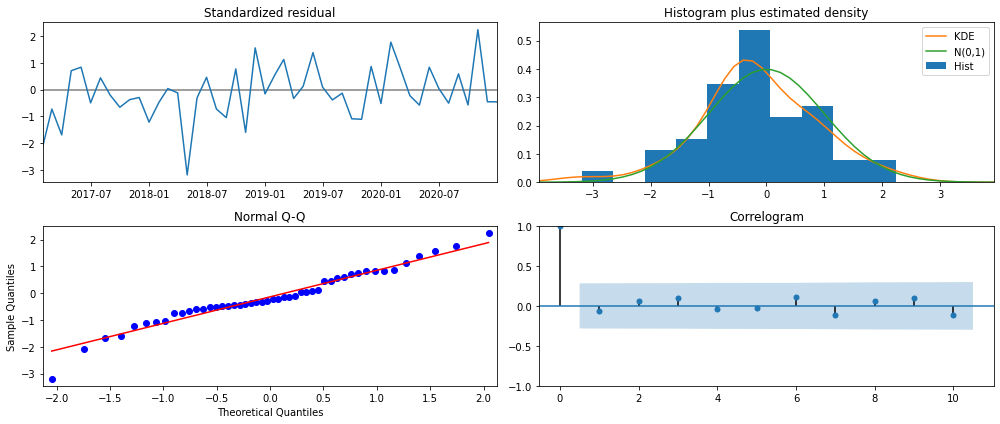

In [ ]:
model.plot_diagnostics(figsize=(14,6))
plt.tight_layout()
plt.show()

In [ ]:
predict=model.get_prediction(start=len(train),
                             end=(len(train)+len(test)-1)
                            )

In [ ]:
predict_values=predict.predicted_mean
bounds=predict.conf_int()
bounds.head()

,lower Temperature,upper Temperature
2021-01-31,25.705995,27.897939
2021-02-28,26.659884,29.013942
2021-03-31,27.035892,29.413870
2021-04-30,27.136064,29.517694
2021-05-31,27.392438,29.774629


In [ ]:
lower_lim=bounds["lower Temperature"]
upper_lim=bounds["upper Temperature"]

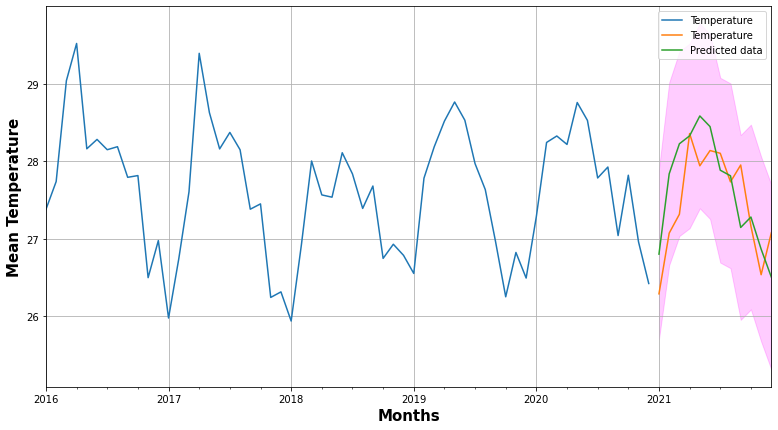

In [ ]:
ax=train.plot(label="Training Data",figsize=(13,7))
test.plot(label="Testing Data",ax=ax)
predict_values.plot(label="Predicted data",ax=ax)
ax.fill_between(bounds.index,lower_lim,upper_lim,color="magenta",alpha=0.2)
plt.xlabel("Months",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.grid(True)
plt.legend(loc="best")
plt.show()

In [ ]:
rmse=mean_squared_error(test["Temperature"].values,predict_values,squared=False)
rmse

0.5271614479099459

In [ ]:
test.tail()

,Temperature
Time,
2021-08-31,27.733570
2021-09-30,27.951071
2021-10-31,27.163364
2021-11-30,26.536528
2021-12-31,27.078399


In [ ]:
dates_to_predict=pd.date_range(start="2022-01-02",end="2023-01-01",freq="M")
len(dates_to_predict)

12

In [ ]:
new_predict=model.get_prediction(start=len(monthly),
                                 end=(len(monthly)+len(dates_to_predict)-1)
                                )

In [ ]:
new_predict_values=new_predict.predicted_mean

In [ ]:
new_bounds=new_predict.conf_int()
new_lower_lim=new_bounds["lower Temperature"]
new_upper_lim=new_bounds["upper Temperature"]

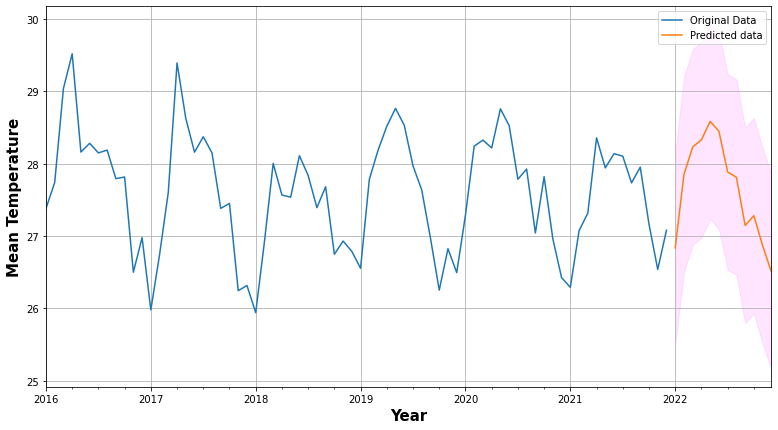

In [ ]:
ax=monthly["Temperature"].plot(label="Original Data",figsize=(13,7))
new_predict_values.plot(label="Predicted data",ax=ax)
ax.fill_between(new_bounds.index,new_lower_lim,new_upper_lim,color="magenta",alpha=0.1)

plt.xlabel("Year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.grid(True)
plt.legend(loc="best")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
train_scale=scaler.fit_transform(train)
test_scale=scaler.transform(test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
time_step=12
generator=TimeseriesGenerator(data=train_scale,
                              targets=train_scale,
                              length=time_step,
                              batch_size=1
                             )

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model=Sequential()

In [ ]:
model.add(LSTM(100,activation="relu",input_shape=(time_step,1),return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(64,activation="relu"))
model.add(Dropout(0.01))

model.add(Dense(32))

model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="mean_squared_error",
              metrics=["mse"]
             )

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 12, 100)           40800     
                                                                 
 dropout_30 (Dropout)        (None, 12, 100)           0         
                                                                 
 lstm_41 (LSTM)              (None, 64)                42240     
                                                                 
 dropout_31 (Dropout)        (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 dense_31 (Dense)            (None, 1)                 33        
                                                                 
Total params: 85,153
Trainable params: 85,153
Non-tra

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callback=EarlyStopping(monitor="loss",patience=50)

In [ ]:
model.fit(generator,epochs=300,steps_per_epoch=40,verbose=False,callbacks=[callback])

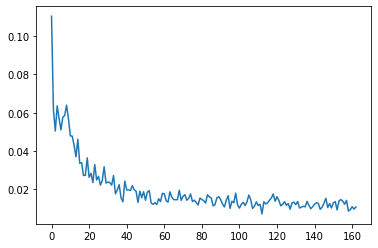

In [ ]:
loss_per_epoch=model.history.history["loss"]
plt.plot(loss_per_epoch)
plt.show()

In [ ]:
import numpy as np
test_pred=[]

test_batch=train_scale[-time_step:]
current_batch=test_batch.reshape(1,time_step,1)

for i in range(len(test)):
    pred=model.predict(current_batch)[0]
    test_pred.append(pred)
    
    current_batch=np.append(current_batch[:,1:,:],[[pred]],axis=1)

In [ ]:
true_pred=scaler.inverse_transform(test_pred)

In [ ]:
test["pred"]=true_pred

In [ ]:
test

,Temperature,pred
Time,,
2021-01-31,26.289849,26.908087
2021-02-28,27.072321,27.717932
2021-03-31,27.316046,28.261578
2021-04-30,28.356151,28.461560
2021-05-31,27.941007,28.567222
2021-06-30,28.137546,28.334511
2021-07-31,28.102419,27.756468
2021-08-31,27.733570,27.401027
2021-09-30,27.951071,27.025609


In [ ]:
from sklearn.metrics import mean_squared_error

rmse=mean_squared_error(test["Temperature"],true_pred,squared=False)
rmse

0.5575150711849083

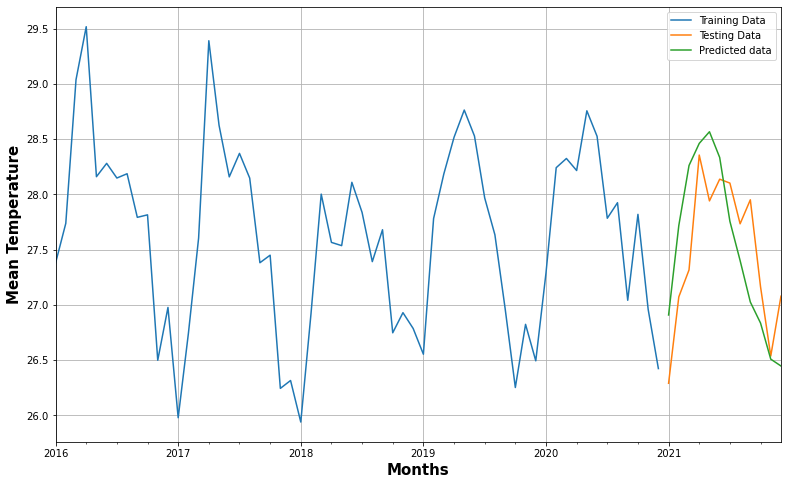

In [ ]:
ax=train["Temperature"].plot(label="Training Data",figsize=(13,8))
test["Temperature"].plot(label="Testing Data")
test["pred"].plot(label="Predicted data",ax=ax)
plt.grid(True)
plt.xlabel("Months",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.legend(loc="best")
plt.show()